In [6]:
!pip install rasterio spectral gdal -q

  error: subprocess-exited-with-error
  
  × Building wheel for GDAL (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [130 lines of output]
      Using numpy 2.3.3
      C:\Users\pedrovictor.veras\AppData\Local\Temp\pip-build-env-3of4ypc5\overlay\Lib\site-packages\setuptools\config\_apply_pyprojecttoml.py:82: SetuptoolsWarning: `license` overwritten by `pyproject.toml`
        corresp(dist, value, root_dir)
      C:\Users\pedrovictor.veras\AppData\Local\Temp\pip-build-env-3of4ypc5\overlay\Lib\site-packages\setuptools\config\_apply_pyprojecttoml.py:82: SetuptoolsWarning: `extras_require` overwritten in `pyproject.toml` (optional-dependencies)
        corresp(dist, value, root_dir)
      running bdist_wheel
      running build
      running build_py
      creating build\lib.win-amd64-cpython-313\osgeo
      copying osgeo\gdal.py -> build\lib.win-amd64-cpython-313\osgeo
      copying osgeo\gdalconst.py -> build\lib.win-amd64-cpython-313\osgeo
      copying osgeo\gdalnumer

# Leitura do arquivo

In [ ]:
# Bibliotecas
import numpy as np
import rasterio as rio
from spectral import imshow
import matplotlib.pyplot as plt
from rasterio.plot import reshape_as_image
from osgeo import gdal
import pandas as pd

In [8]:
# Leitura do arquivo de imagem
img = 'L71221071_07120010720_DN.tif'

In [9]:
# Rasterio
with rio.open(img) as src:
  meta = src.profile
  array_rasterio = reshape_as_image(src.read())

In [10]:
print(meta)

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 1520, 'height': 1233, 'count': 6, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 23S",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-45],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",10000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32723"]]'), 'transform': Affine(30.0, 0.0, 160664.99999999997,
       0.0, -30.0, 8279275.0), 'blockxsize': 1520, 'blockysize': 1, 'tiled': False, 'interleave': 'pixel'}


# Visualização

ImageView object:
  Display bands       :  (2, 1, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [np.float64(27.0), np.float64(99.0)]
    G: [np.float64(36.0), np.float64(75.0)]
    B: [np.float64(50.0), np.float64(78.0)]

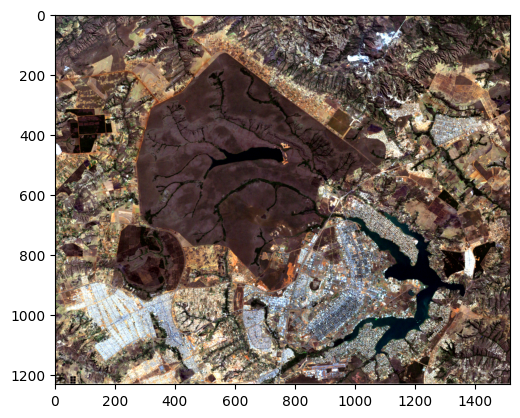

In [11]:
# Visualização
imshow(array_rasterio,(2,1,0), stretch=(0.02,0.98))

In [12]:
def stretch(img, percent_ini=2, percent_end=98):

  s = np.zeros_like(img)
  x,y = np.min(img), np.max(img)
  w = np.percentile(img, percent_ini)
  z = np.percentile(img, percent_end)

  f = x + (img - w) * (y - x) / (z - w)

  f[f < x] = x
  f[f > y] = y
  s = f

  return s


In [ ]:
array_rasterio[:,:,0 ]

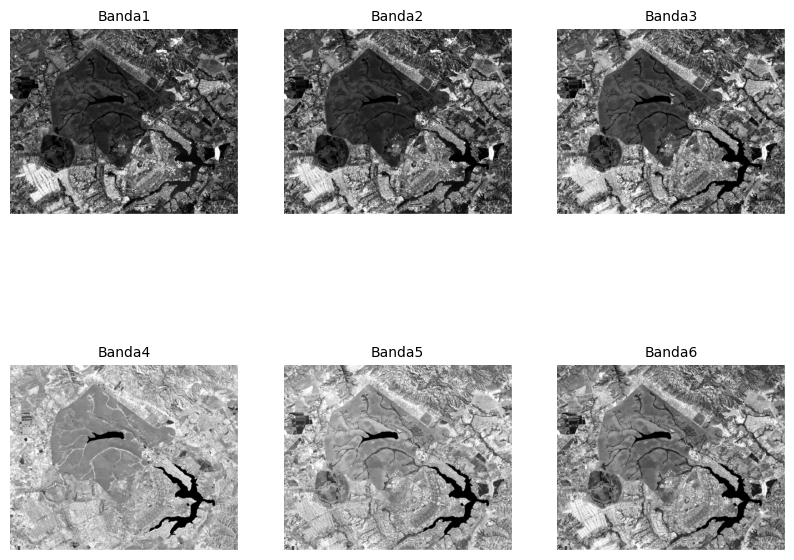

In [13]:
# Visualizando bandas separadas
fig, axes = plt.subplots(2,3, figsize=(10,8))

axes = axes.ravel()

for i in range(array_rasterio.shape[2]):
  axes[i].imshow(stretch(array_rasterio[:,:,i]), cmap = 'gray')
  axes[i].set_title('Banda' + str(i+1), fontsize=10)
  axes[i].axis('off')
plt.show()

(array([1.40000e+01, 1.15830e+04, 2.00413e+05, 7.43639e+05, 4.15492e+05,
        2.45436e+05, 1.37521e+05, 5.38960e+04, 3.14260e+04, 1.58110e+04,
        7.67700e+03, 2.63000e+03, 1.53900e+03, 1.19300e+03, 6.67000e+02,
        4.96000e+02, 4.31000e+02, 2.47000e+02, 1.53000e+02, 1.35000e+02,
        1.46000e+02, 8.50000e+01, 6.80000e+01, 6.40000e+01, 4.50000e+01,
        5.30000e+01, 4.20000e+01, 3.80000e+01, 4.10000e+01, 3.00000e+01,
        3.80000e+01, 2.80000e+01, 2.70000e+01, 2.80000e+01, 1.80000e+01,
        2.00000e+01, 2.60000e+01, 2.50000e+01, 1.80000e+01, 1.30000e+01,
        2.60000e+01, 8.00000e+00, 1.30000e+01, 2.00000e+01, 1.40000e+01,
        1.00000e+01, 9.00000e+00, 1.30000e+01, 1.00000e+01, 2.78500e+03]),
 array([ 40. ,  44.3,  48.6,  52.9,  57.2,  61.5,  65.8,  70.1,  74.4,
         78.7,  83. ,  87.3,  91.6,  95.9, 100.2, 104.5, 108.8, 113.1,
        117.4, 121.7, 126. , 130.3, 134.6, 138.9, 143.2, 147.5, 151.8,
        156.1, 160.4, 164.7, 169. , 173.3, 177.6, 181.9

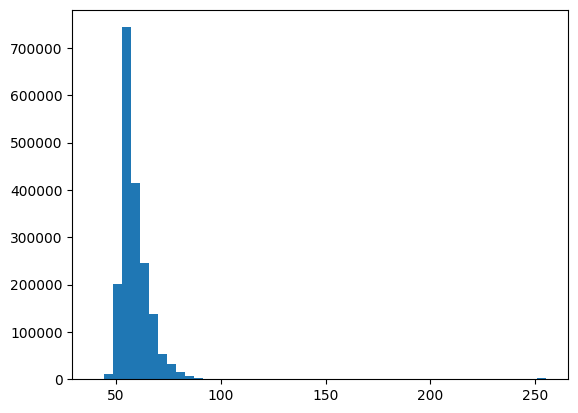

In [29]:
plt.hist(array_rasterio[:,:,0 ].flatten(), bins=50)

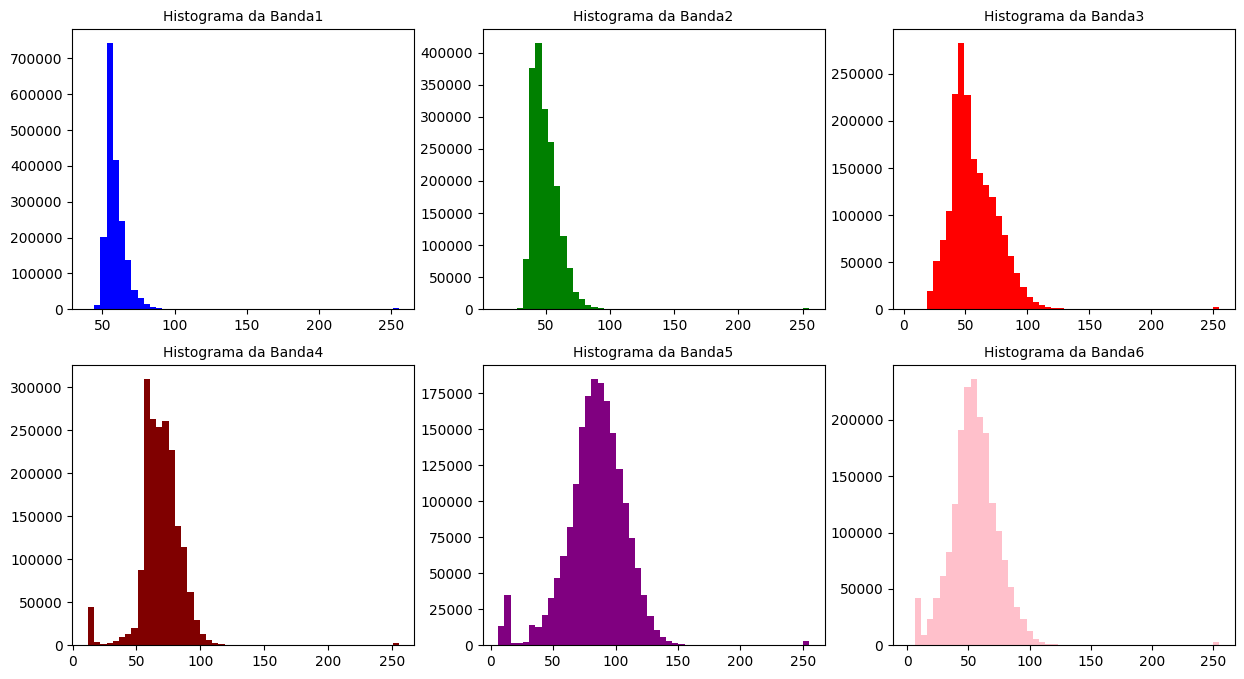

In [14]:
# Visualizando histogramas

colors = ['Blue', 'Green', 'Red', 'Maroon', 'Purple', 'Pink']
fig, axes = plt.subplots(2,3, figsize=(15,8))

axes = axes.ravel()

for i in range(array_rasterio.shape[2]):
  axes[i].hist(array_rasterio[:,:,i].flatten(), bins=50, color= colors[i])
  axes[i].set_title('Histograma da Banda' + str(i+1), fontsize=10)
plt.show()

In [15]:
array_rasterio.reshape(array_rasterio.shape[0]*array_rasterio.shape[1], array_rasterio.shape[2]).shape

(1874160, 6)

In [16]:
# Criando pandas Dataframe
df = pd.DataFrame(array_rasterio.reshape(array_rasterio.shape[0]*array_rasterio.shape[1], array_rasterio.shape[2]),
columns = ['B1', 'B2', 'B3','B4', 'B5', 'B6'])
df.head()

,B1,B2,B3,B4,B5,B6
0,64,56,67,87,95,55
1,64,59,70,88,109,61
2,64,57,70,85,109,63
3,63,59,69,85,114,70
4,68,58,70,81,123,81


<Figure size 2000x2000 with 0 Axes>

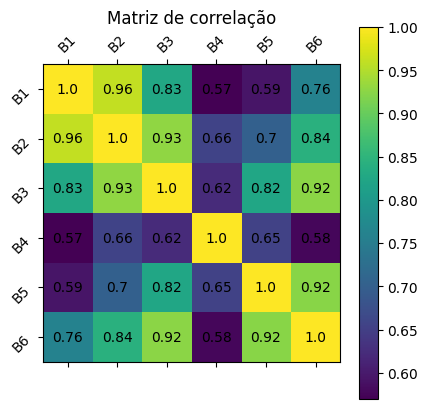

In [17]:
# Matriz de correlação
corr = df.corr()

fig = plt.figure(figsize=(20,20))

plt.matshow(corr)
plt.colorbar()
plt.title('Matriz de correlação')
plt.xticks(range(len(corr.columns)), corr.columns, rotation = 45)
plt.yticks(range(len(corr.columns)), corr.columns, rotation = 45)

# Colocando rótulos na matriz
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = plt.text(j, i, round(corr.iloc[i, j],2),
                       ha="center", va="center", color="Black")

plt.show()

<Figure size 2000x2000 with 0 Axes>

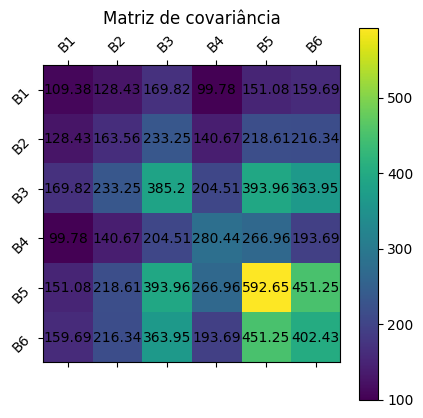

In [18]:
# Matriz de covariância
cov = df.cov()

fig = plt.figure(figsize=(20,20))

plt.matshow(cov)
plt.colorbar()
plt.title('Matriz de covariância')
plt.xticks(range(len(cov.columns)), cov.columns, rotation = 45)
plt.yticks(range(len(cov.columns)), cov.columns, rotation = 45)

# Colocando rótulos na matriz
for i in range(len(cov.columns)):
    for j in range(len(cov.columns)):
        text = plt.text(j, i, round(cov.iloc[i, j],2),
                       ha="center", va="center", color="Black")

plt.show()

# Operações raster

In [19]:
# índices espectrais

NDVI = (array_rasterio[...,3] - array_rasterio[...,2]) / (array_rasterio[...,3] + array_rasterio[...,2])
NDWI = (array_rasterio[...,1] - array_rasterio[...,3]) / (array_rasterio[...,1] + array_rasterio[...,3])

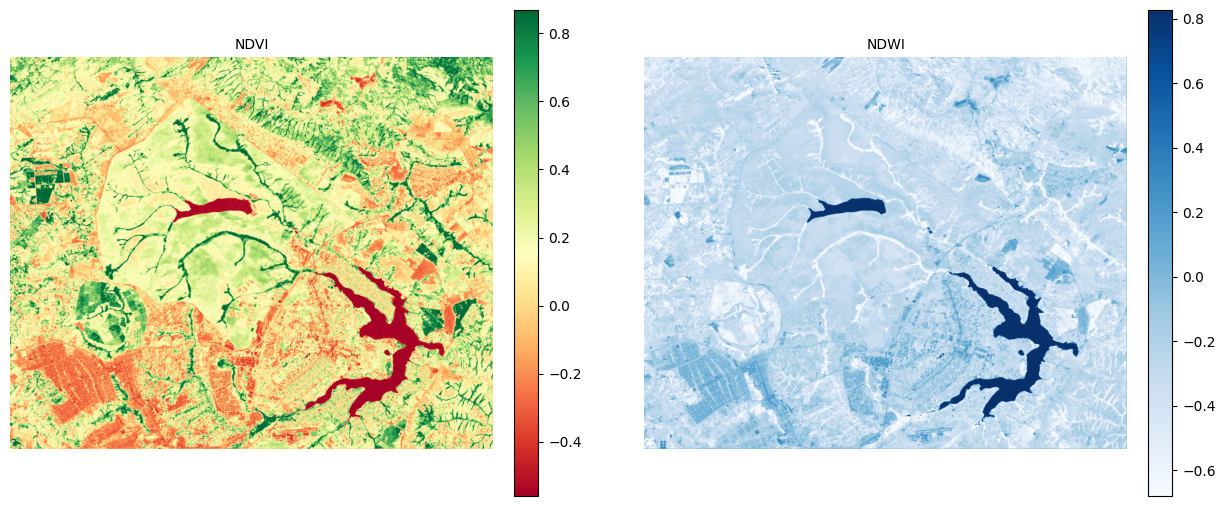

In [20]:
# visualização

fig, axes = plt.subplots(1,2, figsize=(15,10))
axes = axes.ravel()

# NDVI
im0 = axes[0].imshow(stretch(NDVI), cmap = 'RdYlGn')
axes[0].set_title('NDVI', fontsize=10)
axes[0].axis('off')
fig.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)

# NDWI
im1 = axes[1].imshow(stretch(NDWI), cmap = 'Blues')
axes[1].set_title('NDWI', fontsize=10)
axes[1].axis('off')
fig.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)


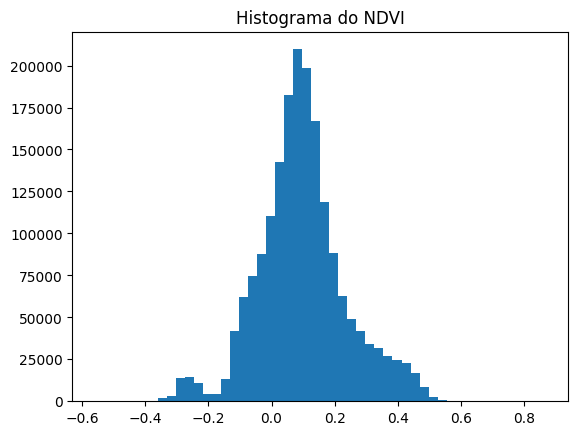

In [21]:
# Histograma do NDVI
plt.hist(np.clip(NDVI.flatten(), -1,1), bins=50)
plt.title('Histograma do NDVI')
plt.show()

# Classificação não-supervisionada


In [22]:
# Reformatando dimensões
data = array_rasterio.reshape(array_rasterio.shape[0]*array_rasterio.shape[1], array_rasterio.shape[2])

In [23]:
from sklearn.cluster import KMeans

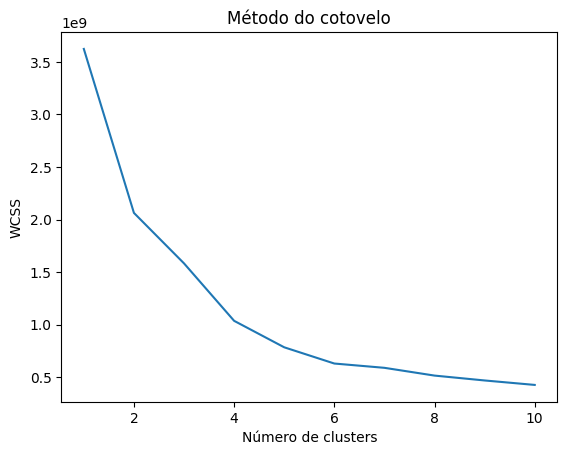

In [24]:
# Método do cotovelo
wcss = []
for i in range(1,11):
  k_means = KMeans(n_clusters=i, max_iter = 30, random_state = 10)
  k_means.fit(data)
  wcss.append(k_means.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Método do cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
# Rodando o kmeans
k_means = KMeans(n_clusters=6, max_iter = 50, random_state = 10)
k_means.fit(data)

labels = k_means.labels_
pred = labels.reshape(array_rasterio.shape[0], array_rasterio.shape[1])

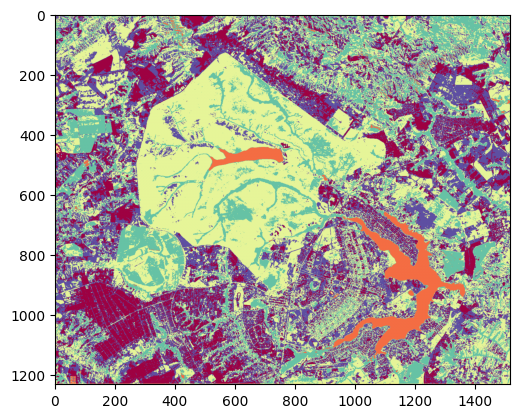

In [26]:
# Visualizar resultado
plt.imshow(pred, cmap = 'Spectral_r')
plt.show()

In [27]:
# Gravar resultado em disco
meta.update(count=1)
with rio.open('kmeans.tif', 'w', **meta) as dst:
  dst.write(pred,1)